In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
# load data
PATH = "UCI_HAR_Dataset/"
X_train = pd.read_csv(PATH + "train/X_train.txt", sep=r"\s+", header=None)
y_train = pd.read_csv(PATH + "train/y_train.txt", sep=r"\s+", header=None, names=["Activity"])
activity_map = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 
                4: "SITTING", 5: "STANDING", 6: "LAYING"}
y_train["Activity"] = y_train["Activity"].map(activity_map)

In [19]:
# binary labels
def to_binary(activity):
    return 1 if activity in ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"] else 0
y_train["Binary"] = y_train["Activity"].apply(to_binary)

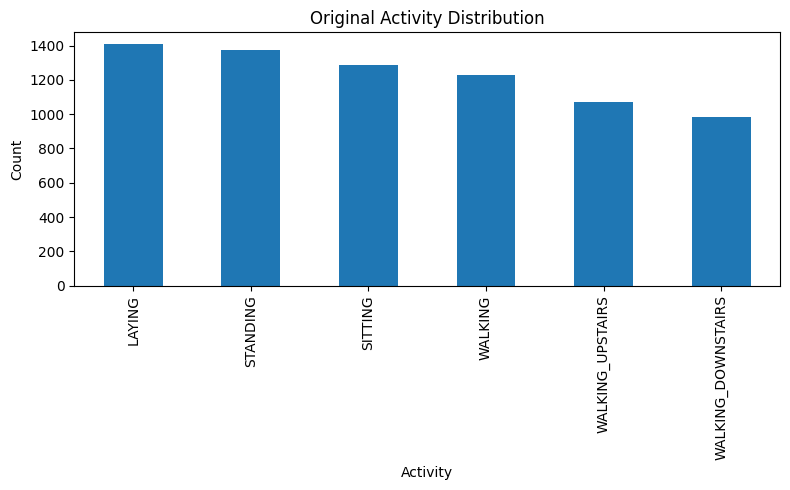

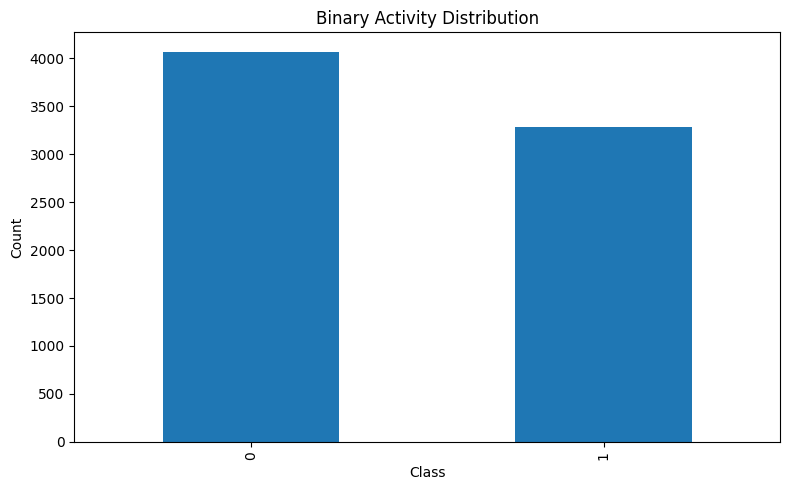

In [20]:
# bar chart - original activity distribution
plt.figure(figsize=(8, 5))
y_train["Activity"].value_counts().plot(kind='bar')
plt.title('Original Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/original_activity_distribution.png')
plt.show()

# bar chart - binary activity distribution
plt.figure(figsize=(8, 5))
y_train["Binary"].value_counts().plot(kind='bar', tick_label=['Inactive', 'Active'])
plt.title('Binary Activity Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/binary_activity_distribution.png')
plt.show()

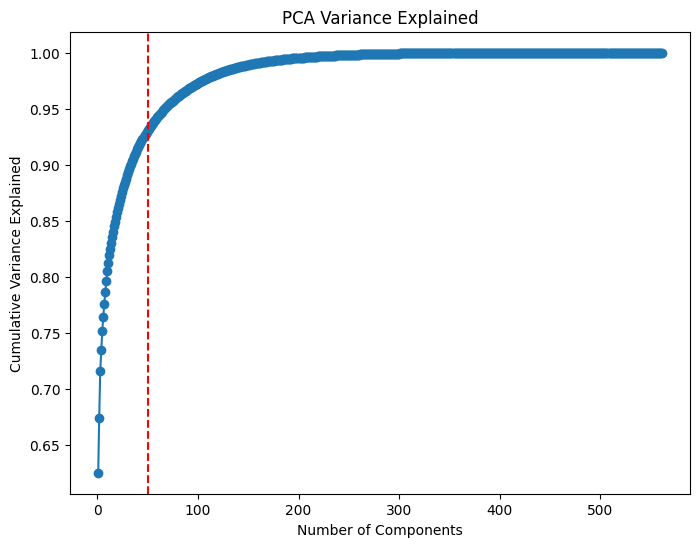

In [21]:
# PCA variance
pca = PCA()
pca.fit(X_train)
cum_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o')
plt.axvline(50, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA Variance Explained')
plt.savefig('images/pca_variance_explained.png')
plt.show()